In [1]:
import pandas as pd
pumpkins = pd.read_csv('../data/US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [3]:
columns_to_select = ['Package', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, columns_to_select]

In [4]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month


In [12]:
print(month)
print(price)


Index([ 4,  5,  9,  9, 11, 11,  9,  9, 10, 10,
       ...
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
      dtype='int32', name='Date', length=1757)
0       275.00
1       275.00
2       160.00
3       160.00
4        95.00
         ...  
1752     14.75
1753    275.00
1754    275.00
1755    275.00
1756    275.00
Length: 1757, dtype: float64


In [17]:
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})

In [18]:
new_pumpkins.columns

Index(['Month', 'Package', 'Low Price', 'High Price', 'Price'], dtype='object')

In [14]:
# Combine month and price into a DataFrame
pumpkins['Month'] = month
pumpkins['Mid_Price'] = price

# Group by month to get average mid price
monthly_avg_price = pumpkins.groupby('Month')['Mid_Price'].mean()
print(monthly_avg_price)


Month
1     131.666667
2     216.875000
3     210.000000
4     220.833333
5     233.500000
6     291.428571
7     252.000000
8     119.588889
9     130.190299
10    128.885167
11    109.167361
12     85.000000
Name: Mid_Price, dtype: float64


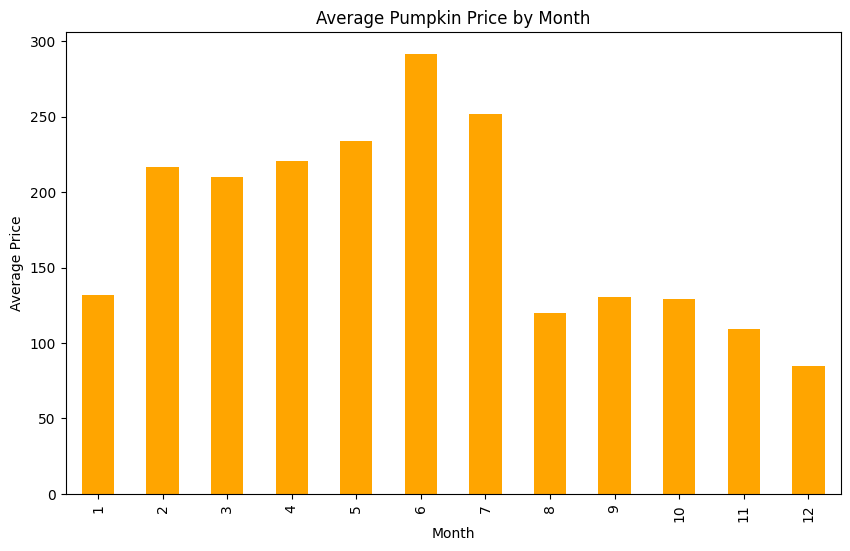

In [15]:
import matplotlib.pyplot as plt

monthly_avg_price.plot(kind='bar', color='orange', figsize=(10,6))
plt.title("Average Pumpkin Price by Month")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.show()


In [16]:
pumpkins.columns

Index(['Package', 'Low Price', 'High Price', 'Date', 'Month', 'Mid_Price'], dtype='object')